In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


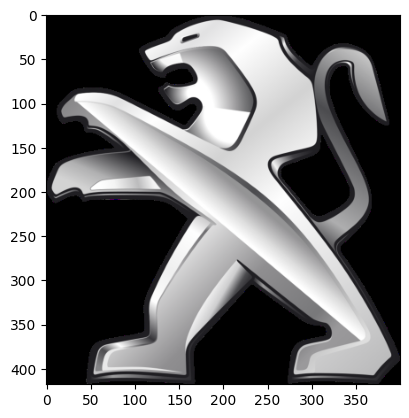

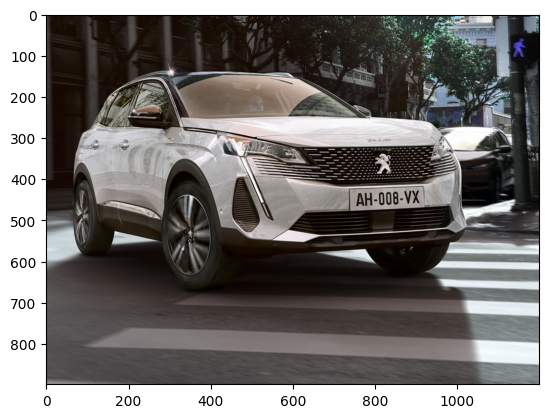

In [223]:
def read_image(file_path):
    return cv2.imread(file_path)

logo_peugeot = read_image("C:\\Users\\Ajeansquid\\Documents\\projet 2023 2024\\logos\\logo_peugeot4.png")

img_voiture = read_image("C:\\Users\\Ajeansquid\\Documents\\projet 2023 2024\\voitures\\peugeot1.jpg")

plt.imshow(logo_peugeot)
plt.show()
plt.imshow(img_voiture)
plt.show()


In [202]:
def niv_gris(image):
    imgNG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgNG


def ORB(img):
    orb = cv2.ORB_create() # création de l’objet de la classe ORB
    #Extraction des points et des descripteurs
    img_gris = niv_gris(img)
    points, descripteursImg = orb.detectAndCompute(img_gris, None)
    return points, descripteursImg

def SIFT(img):
    sift = cv2.SIFT_create()
    img_gris = niv_gris(img)
    points, descripteursImg = sift.detectAndCompute(img_gris, None)
    return points, descripteursImg

def compa_force_brute_SIFT(img1, img2):
    algoBF = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    # Normalisation des images
    
    img1_gray = niv_gris(img1)
    img2_gray = niv_gris(img2)

    # Egalisation de la luminosité des images
    img1_eq = cv2.equalizeHist(img1_gray)
    img2_eq = cv2.equalizeHist(img2_gray)

    contour_voiture= cv2.Canny(img2_eq, 100, 200)
    contour_logo = cv2.Canny(img1_eq, 100, 200)

    #  Filtrage de l'image logo_peugeot
    mask = cv2.inRange(img1, 255, 255)
    logo_filtre = cv2.bitwise_and(img1, img1, mask=mask)

    points1, descripteurs_img1 = SIFT(logo_filtre)
    points2, descripteurs_img2 = SIFT(img2_eq)

   
    paires_corresp = algoBF.knnMatch(descripteurs_img1, descripteurs_img2, k=2)
    

    # Filtrer les correspondances en utilisant le ratio de Lowe
    bonnes_correspondances = []
    ratio_lowe = 0.75
    for m, n in paires_corresp:
        if m.distance < ratio_lowe * n.distance:
            bonnes_correspondances.append(m)
    
    # Filtrer les correspondances en utilisant la distance euclidienne
    flags = cv2.Stitcher.CHECK_CONTOURS + cv2.Stitcher.CHECK_ORIENTATION + cv2.Stitcher.CHECK_VALIDITY
    matches_valide = cv2.Stitcher.validateMatches(bonnes_correspondances, contour_voiture, contour_logo, flags)

    # Dessiner les correspondances
    matches_valide = cv2.drawMatches(contour_logo, points1, contour_voiture, points2, bonnes_correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Redimensionnement de l'image
    matches_valide = cv2.resize(matches_valide, dsize=(2000, 1000))

    return matches_valide

def compa_force_brute_ORB(img1, img2):
    algoBF = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)


      # Normalisation des images
    
    img1_gray = niv_gris(img1)
    img2_gray = niv_gris(img2)

    # Egalisation de la luminosité des images
    img1_eq = cv2.equalizeHist(img1_gray)
    img2_eq = cv2.equalizeHist(img2_gray)

    contour_voiture= cv2.Canny(img2_eq, 100, 200)
    contour_logo = cv2.Canny(img1_eq, 100, 200)

    points1, descripteurs_img1 = ORB(img1)
    points2, descripteurs_img2 = ORB(img2)

    
    paires_corresp = algoBF.knnMatch(descripteurs_img1, descripteurs_img2, k=2)
    
    
    # Filtrer les correspondances en utilisant le ratio de Lowe
    bonnes_correspondances = []
    ratio_lowe = 0.75
    for m, n in paires_corresp:
        if m.distance < ratio_lowe * n.distance:
            bonnes_correspondances.append(m)
    

    # Dessiner les correspondances
    img_matches = cv2.drawMatches(contour_logo, points1, contour_voiture, points2, bonnes_correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Redimensionnement de l'image
    img_matches = cv2.resize(img_matches, dsize=(2000, 1200))

    return img_matches




def image_points(img):
    points, _ = ORB(img)
    img_with_points = img.copy()
    cv2.drawKeypoints(img, points, img_with_points,color=(0, 0, 255))
    return img_with_points

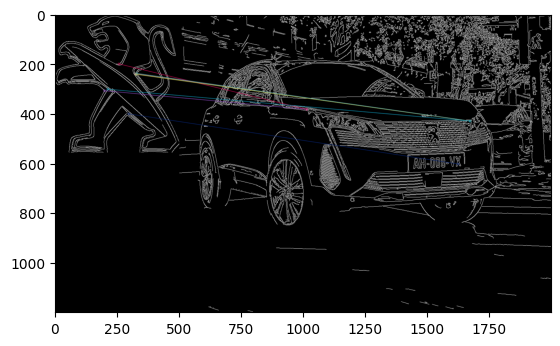

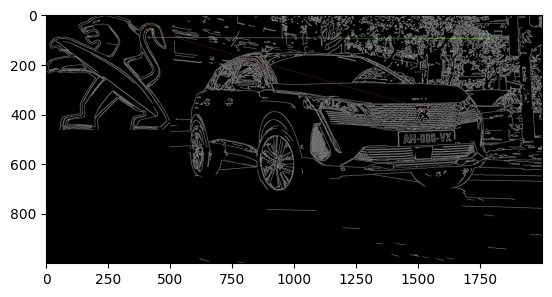

In [219]:
plt.imshow(compa_force_brute_ORB(logo_peugeot,img_voiture))
plt.show()

plt.imshow(compa_force_brute_SIFT(logo_peugeot,img_voiture))
plt.show()



In [220]:
cv2.imshow("image",compa_force_brute_ORB(logo_peugeot,img_voiture))
cv2.waitKey(0)



-1

In [221]:
cv2.imshow("image",compa_force_brute_SIFT(logo_peugeot,img_voiture))
cv2.waitKey(0)

-1